# Libraries import & Data reading

1. Libraries import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

### Dataset Columns:

**Person ID:** An identifier for each individual.\
**Gender:** The gender of the person (Male/Female).\
**Age:** The age of the person in years.\
**Occupation:** The occupation or profession of the person.\
**Sleep Duration (hours):** The number of hours the person sleeps per day.\
**Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.\
**Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.\
**Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.\
**BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight).\
**Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.\
**Heart Rate (bpm):** The resting heart rate of the person in beats per minute.\
**Daily Steps:** The number of steps the person takes per day.\
**Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).\

2. Reading DF

In [ ]:
sleep_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", index_col=0)
sleep_df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# EDA

In [ ]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


Divide "Blood Pressure" column into "Systolic BP" and "Diastolic BP"

In [ ]:
Systolic_BP = [int(a[:a.find('\\') - 2]) for a in sleep_df['Blood Pressure']]
Diastolic_BP = [int(a[a.find('\\') - 1:]) for a in sleep_df['Blood Pressure']]
sleep_df_updated = sleep_df.drop(['Blood Pressure'], axis=1)
sleep_df_updated.insert(10, "Systolic BP", Systolic_BP)
sleep_df_updated.insert(11, "Diastolic BP",Diastolic_BP)
sleep_df_updated

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Sleep Apnea


### Searching for empty lines

In [ ]:
sleep_df_updated.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Systolic BP                  0
Diastolic BP                 0
Sleep Disorder             219
dtype: int64

In [ ]:
sleep_df_updated['Sleep Disorder'] = sleep_df_updated['Sleep Disorder'].fillna('No disorder') # swapping NaN for No disorder

### Deleting Duplicates

In [ ]:
sleep_df_updated.shape

(374, 13)

In [ ]:
sleep_df_updated.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,No disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,No disorder
3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,No disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea


As we can see some of the series are duplicated

In [ ]:
sleep_df_updated = sleep_df_updated.drop_duplicates()
sleep_df_updated.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,No disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,No disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,140,90,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,140,90,Insomnia


In [ ]:
sleep_df_updated.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,132.0,41.128788,8.813942,27.0,33.75,41.00,49.000,59.0
Sleep Duration,132.0,7.082576,0.775335,5.8,6.40,7.15,7.725,8.5
Quality of Sleep,132.0,7.151515,1.269037,4.0,6.00,7.00,8.000,9.0
Physical Activity Level,132.0,58.393939,20.468840,30.0,44.25,60.00,75.000,90.0
Stress Level,132.0,5.537879,1.740428,3.0,4.00,6.00,7.000,8.0
Heart Rate,132.0,71.204545,4.867306,65.0,68.00,70.00,74.000,86.0
Daily Steps,132.0,6637.878788,1766.288657,3000.0,5000.00,7000.00,8000.000,10000.0
Systolic BP,132.0,128.363636,7.825650,115.0,120.75,130.00,135.000,142.0
Diastolic BP,132.0,84.537879,6.049926,75.0,80.00,85.00,88.500,95.0


### Outliers search

<Axes: xlabel='Age'>

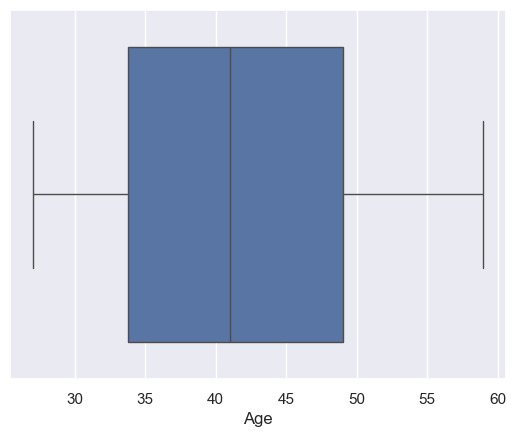

In [ ]:
sns.boxplot(x=sleep_df_updated['Age'])

<Axes: xlabel='Sleep Duration'>

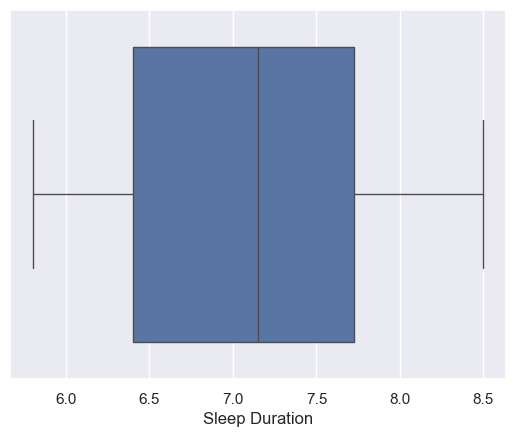

In [ ]:
sns.boxplot(x=sleep_df_updated['Sleep Duration'])

<Axes: xlabel='Daily Steps'>

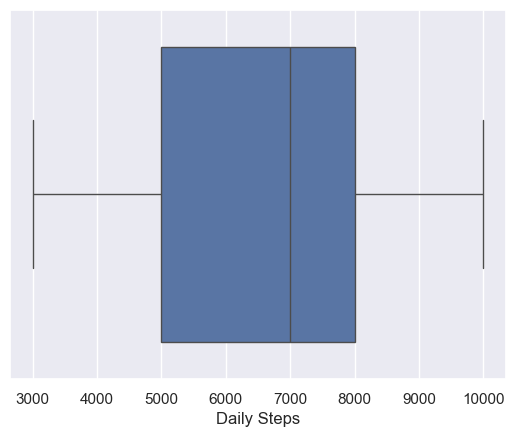

In [ ]:
sns.boxplot(x=sleep_df_updated['Daily Steps'])

In [ ]:
sleep_df_updated.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,No disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,No disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,140,90,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,140,90,Insomnia


In [ ]:
df_corr = sleep_df_updated[['Age','Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']]
df_corr.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
Person ID,,,,,,,,,
1,27,6.1,6,42,6,77,4200,126,83
2,28,6.2,6,60,8,75,10000,125,80
4,28,5.9,4,30,8,85,3000,140,90
6,28,5.9,4,30,8,85,3000,140,90
7,29,6.3,6,40,7,82,3500,140,90


Clearing out the outliers with quantiles

In [ ]:
Q1 = df_corr.quantile(0.25)
Q3 = df_corr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                          15.250
Sleep Duration                1.325
Quality of Sleep              2.000
Physical Activity Level      30.750
Stress Level                  3.000
Heart Rate                    6.000
Daily Steps                3000.000
Systolic BP                  14.250
Diastolic BP                  8.500
dtype: float64


In [ ]:
df_corr = df_corr[~((df_corr < (Q1 - 1.5 * IQR)) |(df_corr > (Q3 + 1.5 * IQR))).any(axis=1)]
df_corr.shape

(127, 9)

# DataVis Part

Text(0.5, 0, '')

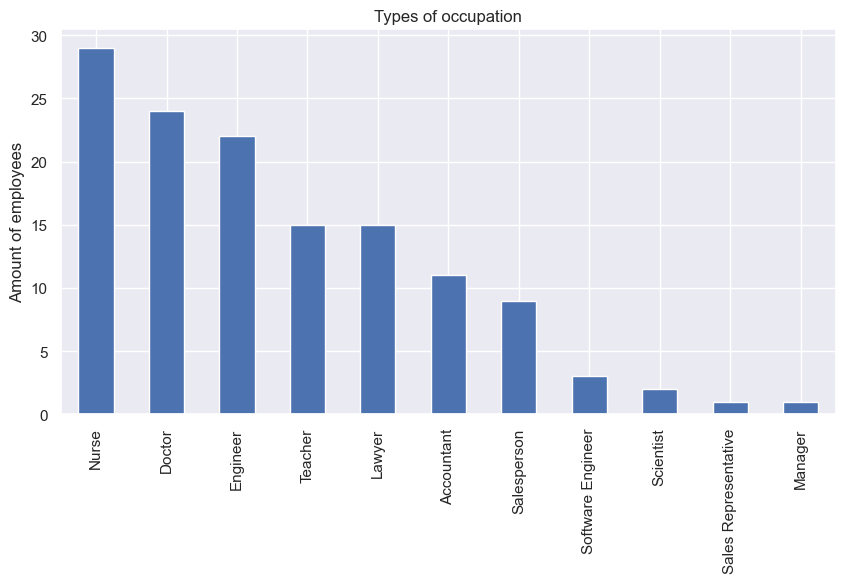

In [ ]:
sleep_df_updated.Occupation.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Types of occupation")
plt.ylabel('Amount of employees')
plt.xlabel(None)

([<matplotlib.patches.Wedge at 0x156eb779310>,
 [Text(-0.026177462468958905, 1.0996884742774593, 'Male'),
  Text(0.02617742751370071, -1.099688475109549, 'Female')],
 [Text(-0.014278615892159402, 0.5998300768786141, '50.8%'),
  Text(0.014278596825654931, -0.5998300773324812, '49.2%')])

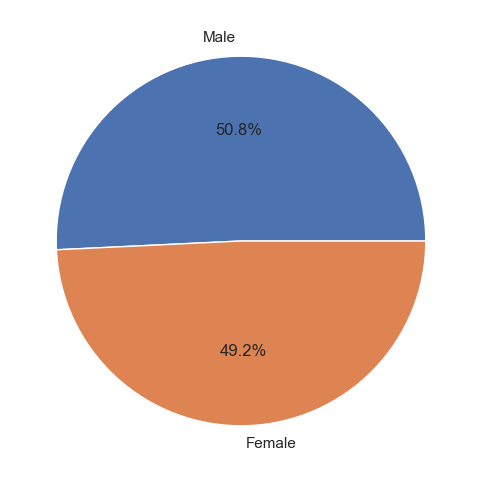

In [ ]:
Gender_count = sleep_df_updated["Gender"].value_counts()
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(Gender_count, labels=['Male','Female'], autopct='%1.1f%%')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
Age,1.000000,0.323367,0.456182,0.225258,-0.381712,-0.249433,0.104080,0.595448,0.576571
Sleep Duration,0.323367,1.000000,0.868496,0.234117,-0.819225,-0.604443,-0.000828,-0.218090,-0.206623
Quality of Sleep,0.456182,0.868496,1.000000,0.240999,-0.885691,-0.738970,0.094600,-0.148787,-0.141493
Physical Activity Level,0.225258,0.234117,0.240999,1.000000,-0.064561,0.015225,0.769481,0.237956,0.347780
Stress Level,-0.381712,-0.819225,-0.885691,-0.064561,1.000000,0.712069,0.144465,0.145569,0.139976
Heart Rate,-0.249433,-0.604443,-0.738970,0.015225,0.712069,1.000000,-0.111561,0.299284,0.286919
Daily Steps,0.104080,-0.000828,0.094600,0.769481,0.144465,-0.111561,1.000000,0.077130,0.203270
Systolic BP,0.595448,-0.218090,-0.148787,0.237956,0.145569,0.299284,0.077130,1.000000,0.973259
Diastolic BP,0.576571,-0.206623,-0.141493,0.347780,0.139976,0.286919,0.203270,0.973259,1.000000


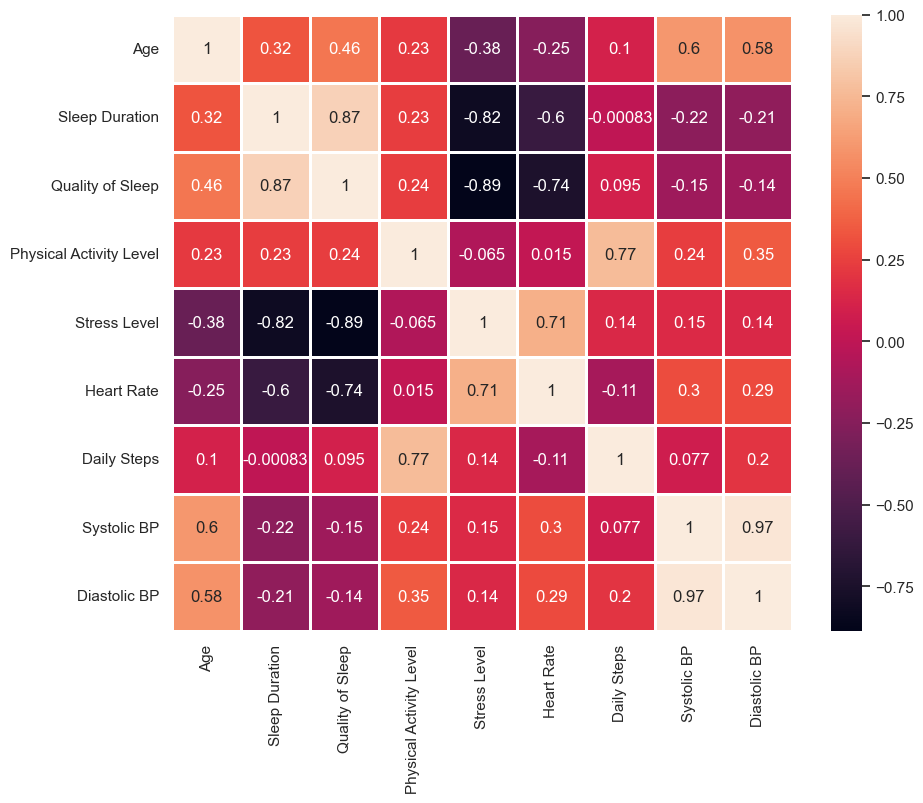

In [ ]:
plt.figure(figsize=(10,8))
c=df_corr.corr()
sns.heatmap(c,annot=True, linewidths=2)
c

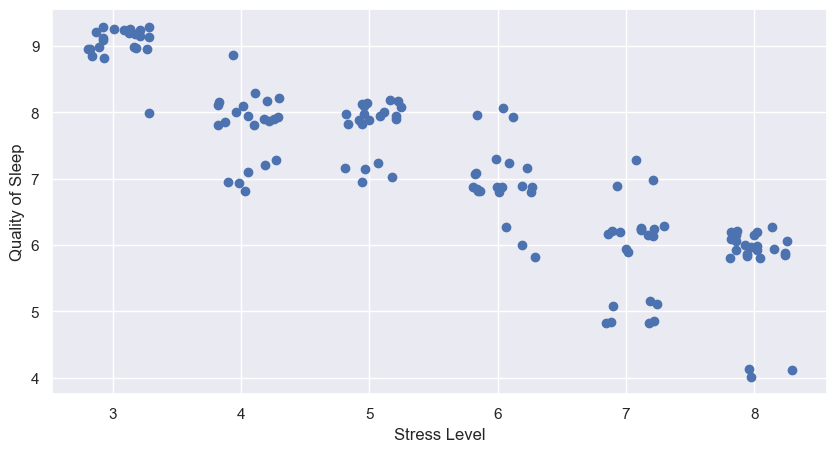

In [ ]:
#creating jitter

jit_x = sleep_df_updated['Stress Level']  + np.random.rand(len(sleep_df_updated['Stress Level'] )) * 0.5 - 0.2
jit_y = sleep_df_updated['Quality of Sleep'] + np.random.rand(len(sleep_df_updated['Quality of Sleep'] )) * 0.5 - 0.2

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(jit_x, jit_y)
ax.set_xlabel('Stress Level')
ax.set_ylabel('Quality of Sleep')
plt.show()

- As we can see there's a strong correlation between the stress level and the quality of sleep
- Also heatmap depicts the fact that physical activity level is hardly correlated with anything except amount of steps, which is logicaL.
- What's more both types of BP are in correlation with age.

Made by: Liamkin Rodion\
tg: @rodion_liamkin